In [12]:
symbol ='BANKNIFTY'
lot = 25

# today = '20-Sep-2022'#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# expiry= '22-Sep-2022' #<<<<<<<<<<<<<<<<< current expiry
expiry_mo = '29-Sep-2022'
# today = '14-Sep-2022'

day = 26
month ='Sep'
year = '2022'

dayE = 29
monthE ='Sep'
yearE = '2022'

In [13]:
if day < 10 :
    val ='0'+str(day)
    today = val+"-"+month+"-"+year
else:
    today = str(day)+"-"+month+"-"+year
# today
if dayE < 10 :
    val ='0'+str(dayE)
    expiry = val+"-"+monthE+"-"+yearE
else:
    expiry = str(dayE)+"-"+monthE+"-"+yearE
# expiry

In [14]:


def get_today_date():
    from datetime import datetime
    date_str = str(datetime.now())
    today=datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    return today.strftime('%d-%b-%Y')

# today = get_today_date()#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# expiry= '22-Sep-2022' #<<<<<<<<<<<<<<<<< current expiry
# # today = '14-Sep-2022'

def get_hh_mm_time(data_df):
    data_df["timestamp"] = pd.to_datetime(data_df["timestamp"])
    data_df["timestamp"] = data_df["timestamp"].dt.strftime('%H:%M')
    return data_df

def get_path_filename(filename):
    path='D:\Jupyter Python\Stocks-office\json-csv\\'
    newFilename=path+filename
    return newFilename


def get_option_ohlc_csv(symbol):
       
        filename = symbol + '-FULL-OPTIONS-OHLC-' + today + ".csv"
        filename=get_path_filename(filename)

        df=pd.read_csv(filename,index_col=False)
        return df
    
def get_option_oi_ema_plot(g1,strike,option,ax):
    import talib as ta
    # ax3 = ax.twinx()

    df=g1.get_group(strike)
    df["openInterest"]=df["openInterest"]*lot
    df['EMA20_oi'] = ta.EMA(df['openInterest'],20)

  
    # ax.plot(df["timestamp"],df["pChange"],label='pChange',color='black')
    # ax3.plot(df['timestamp'], df['pchangeinOpenInterest'],label='pchangeinOpenInterest',color='red') 
    
    ax.plot(df["timestamp"],df["EMA20_oi"],label='EMA20',color='green')
    # ax.plot(df["timestamp"],df["lastPrice"],label='lastPrice',color='black')
    ax.plot(df['timestamp'], df['openInterest'],label='openInterest',color='red') 
    
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


    ax.grid()
    # ax3.tick_params('y', colors='red')

    ax.set_xticks(np.arange(0, len(df)+1, 10))# tick labels every (10*3=30)30 min
    for tick in ax.get_xticklabels():  # rotating labels using ax parameter
        tick.set_rotation(0)

    # ax3.ticklabel_format(style='plain',axis='y') # scientific notation off

    ax.set_title(f"{symbol} {strike} {option}-{today}",size=15)
    ax.set_ylabel("oi",size ='15')
    # leg = ax3.legend(loc="upper center")
    leg = ax.legend(loc="upper left")

def get_option_plot(g1,strike,option,ax):
    ax3 = ax.twinx()
    # ax = plt.gca()


    df=g1.get_group(strike)
    df["openInterest"]=df["openInterest"]*lot
    
    if strike==atm:

        fig.patch.set_facecolor('xkcd:mint green')
  
        ax.plot(df["timestamp"],df["pChange"],label='pChange',color='black')
        ax.axhline(0, color='black', linestyle='--',linewidth='1')

        ax3.plot(df['timestamp'], df['pchangeinOpenInterest'],label='pchangeinOpenInterest',color='red') 
        ax3.axhline(0, color='red', linestyle='--',linewidth='1')
        
    else:
        ax.plot(df["timestamp"],df["pChange"],label='pChange',color='black')
        ax.axhline(0, color='black', linestyle='--',linewidth='1')

        ax3.plot(df['timestamp'], df['pchangeinOpenInterest'],label='pchangeinOpenInterest',color='red') 
        ax3.axhline(0, color='red', linestyle='--',linewidth='1')

    # ax.plot(df["timestamp"],df["vmap"],label='vwap',color='green')
    # ax.plot(df["timestamp"],df["lastPrice"],label='lastPrice',color='black')
    # ax3.plot(df['timestamp'], df['openInterest'],label='openInterest',color='red') 

    ax.grid()
    ax3.tick_params('y', colors='red')

    ax.set_xticks(np.arange(0, len(df)+1, 10))# tick labels every (10*3=30)30 min
    for tick in ax.get_xticklabels():  # rotating labels using ax parameter
        tick.set_rotation(0)

    ax3.ticklabel_format(style='plain',axis='y') # scientific notation off

    ax.set_title(f"{symbol} {strike} {option}-{today}",size=15)
    ax.set_ylabel("price",size ='15')
    leg = ax3.legend(loc="upper center")
    leg = ax.legend(loc="upper left")
    
    
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")

# symbol ='BANKNIFTY'
# lot = 25


option_ohlc = get_option_ohlc_csv(symbol) # read csv file by option type
option_ohlc=get_hh_mm_time(option_ohlc)
# option_ohlc["openInterest"]=round(((option_ohlc["openInterest"]*lot)/100000),1)
option_ohlc=option_ohlc[option_ohlc["openInterest"]!=0] # for droping yesterday data in today csv



atm=int(option_ohlc["underlying"].iloc[-1]) # getting value of ATM strike
atm =round(atm/100)*100
max_=atm+500
min_ = atm-500

g1=option_ohlc.groupby("expiryDate")
df_expiry=g1.get_group(expiry)
g2=df_expiry.groupby("optionType")
df_ce=g2.get_group("Call")
df_pe=g2.get_group("Put")
g1_ce=df_ce.groupby("strikePrice")
g1_pe=df_pe.groupby("strikePrice")



## Future ltp plot with oi

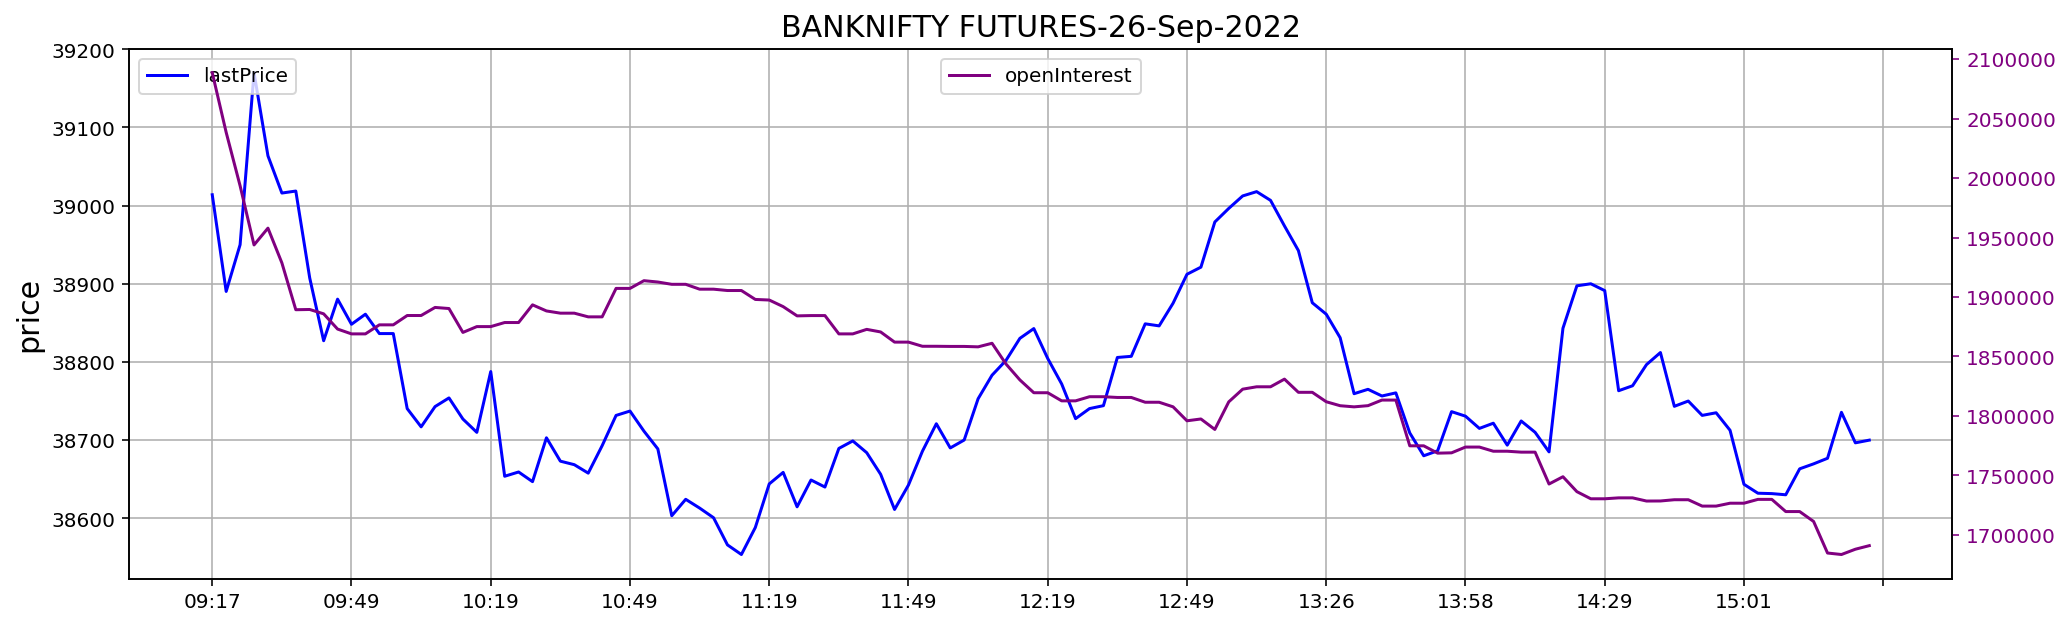

In [15]:
g1=option_ohlc.groupby("instrumentType")
df_fut=g1.get_group('Index Futures')
g2=df_fut.groupby('expiryDate')
df_fut_expiry=g2.get_group(expiry_mo)
df_fut_expiry["openInterest"]=df_fut_expiry["openInterest"]*lot

def get_fut_plot(df,fut,ax):
    ax3 = ax.twinx()

  
    # ax.plot(df["timestamp"],df["pChange"],label='pChange',color='black')
    # ax3.plot(df['timestamp'], df['pchangeinOpenInterest'],label='pchangeinOpenInterest',color='red') 
    ax.plot(df["timestamp"],df["lastPrice"],label='lastPrice',color='blue')
    # ax.plot(df["timestamp"],df["vmap"],label='vwap',color='green')

    ax3.plot(df['timestamp'], df['openInterest'],label='openInterest',color='purple') 

    ax.grid()
    ax3.tick_params('y', colors='purple')

    ax.set_xticks(np.arange(0, len(df)+1, 10))# tick labels every (10*3=30)30 min
    for tick in ax.get_xticklabels():  # rotating labels using ax parameter
        tick.set_rotation(0)

    ax3.ticklabel_format(style='plain',axis='y') # scientific notation off

    ax.set_title(f"{symbol} {fut}-{today}",size=15)
    ax.set_ylabel("price",size ='15')
    leg = ax3.legend(loc="upper center")
    leg = ax.legend(loc="upper left")


fig, ax = plt.subplots(1,1,figsize=(15,5))#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
get_fut_plot(df_fut_expiry,'FUTURES',ax)

fig.tight_layout(pad=3)
plt.show()

# ltp with OI , EMA , vwap

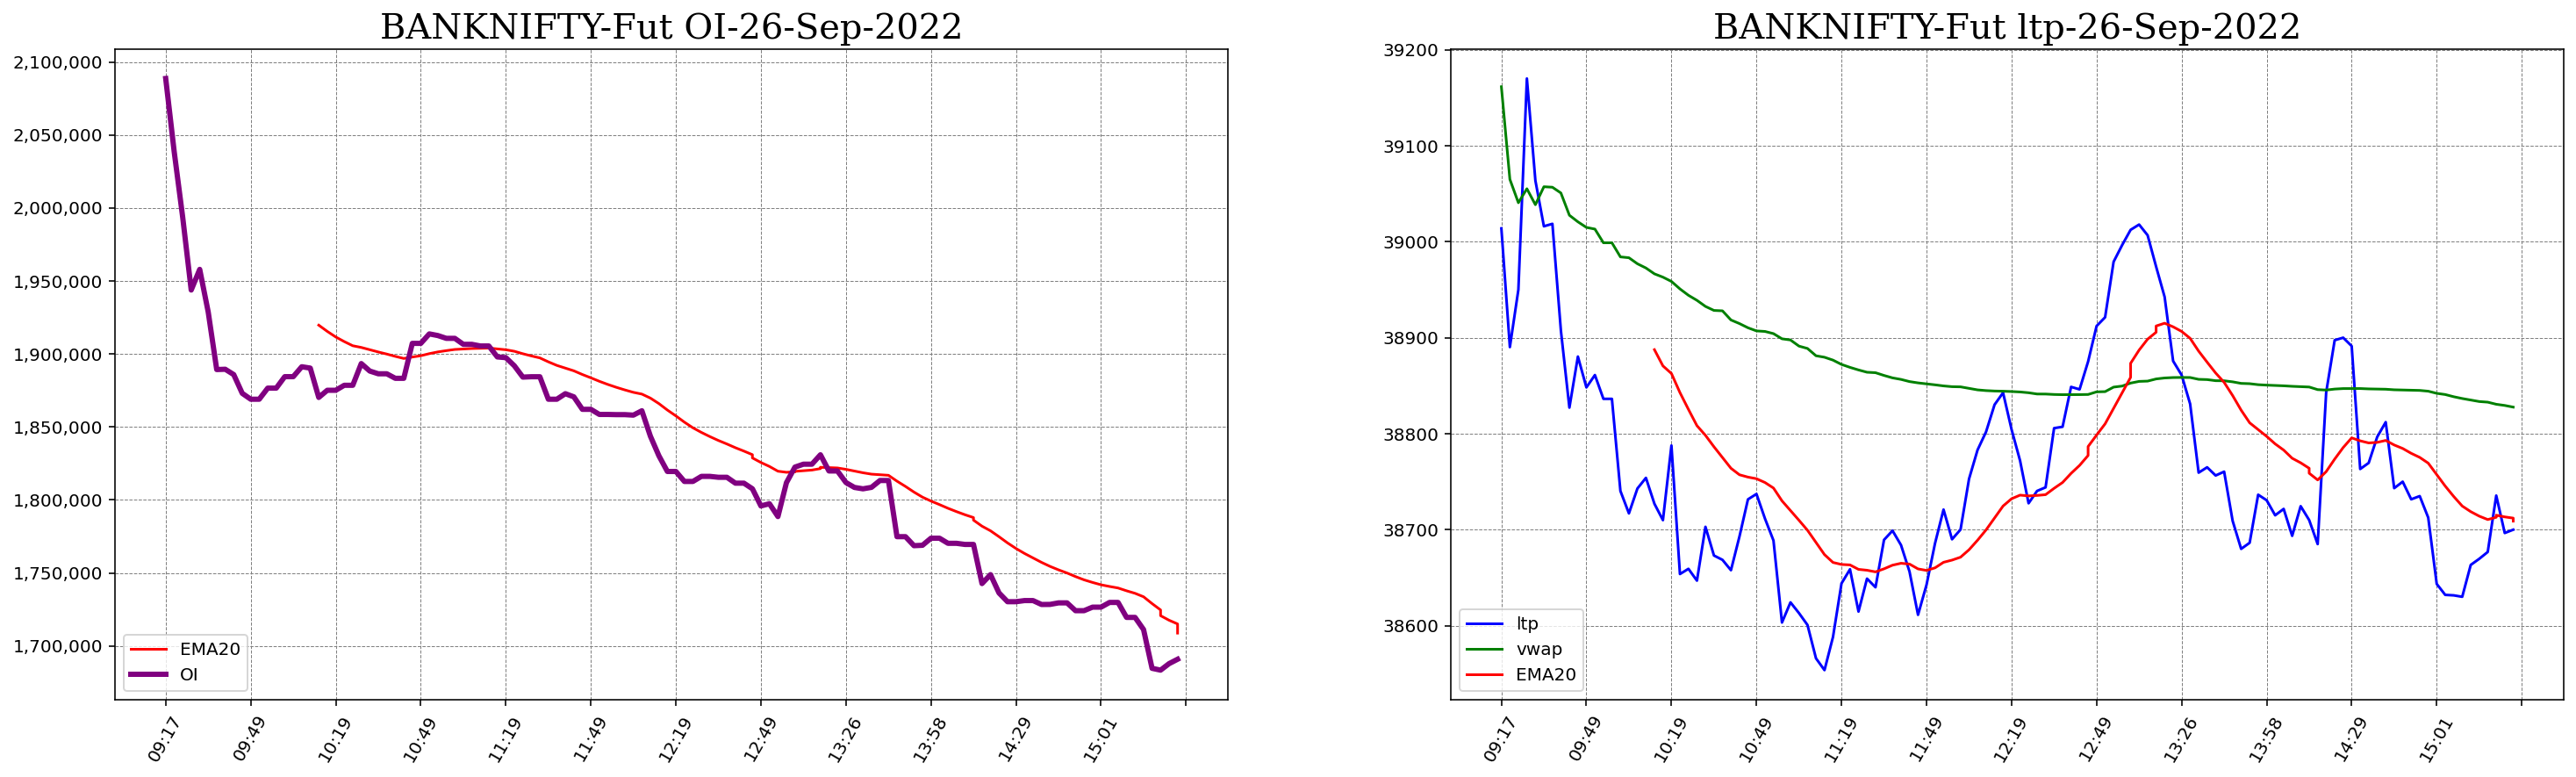

In [16]:
df_fut_oi=df_fut_expiry.copy()
import talib as ta
df_fut_oi['EMA20_oi'] = ta.EMA(df_fut_oi['openInterest'],20)
df_fut_oi['EMA20_ltp'] = ta.EMA(df_fut_oi['lastPrice'],20)

df_fut_oi=get_hh_mm_time(df_fut_oi)

def plot_repeat_usage(df,title):
    font1 = {'family':'serif','color':'black','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.title(f"{symbol}-"+title+f"-{today}",fontdict =font1)
    # plt.legend(['CE','PE'])
    # plt.xlabel("Timestamp",fontdict =font2)
    # plt.ylabel("OI",fontdict =font2)
    plt.xticks(rotation = 60)
    plt.xticks(np.arange(0, len(df["timestamp"])+1, 10))# tick labels every (5*3=15)15 min
    # plt.xticks(fontsize=15)
    # plt.yticks(fontsize=15)
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)


# plt.plot(df_fut_oi["timestamp"],df_fut_oi["EMA20"])
# plt.plot(df_fut_oi["timestamp"],df_fut_oi["openInterest"])
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(221)
plt.plot(df_fut_oi["timestamp"],df_fut_oi["EMA20_oi"],color='red',label="EMA20")
plt.plot(df_fut_oi["timestamp"],df_fut_oi["openInterest"],color='purple',label='OI',linewidth='3')
plt.legend(loc='lower left')
plot_repeat_usage(df_fut_oi,"Fut OI")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax = fig.add_subplot(222)
plt.plot(df_fut_oi["timestamp"],df_fut_oi["lastPrice"],label='ltp',color='blue')
plt.plot(df_fut_oi["timestamp"],df_fut_oi["vmap"],'g',label='vwap')
plt.plot(df_fut_oi["timestamp"],df_fut_oi["EMA20_ltp"],'r',label="EMA20")

plt.legend(loc='lower left')

plot_repeat_usage(df_fut_oi,"Fut ltp")

...
plt.show()

In [17]:
atm

38700

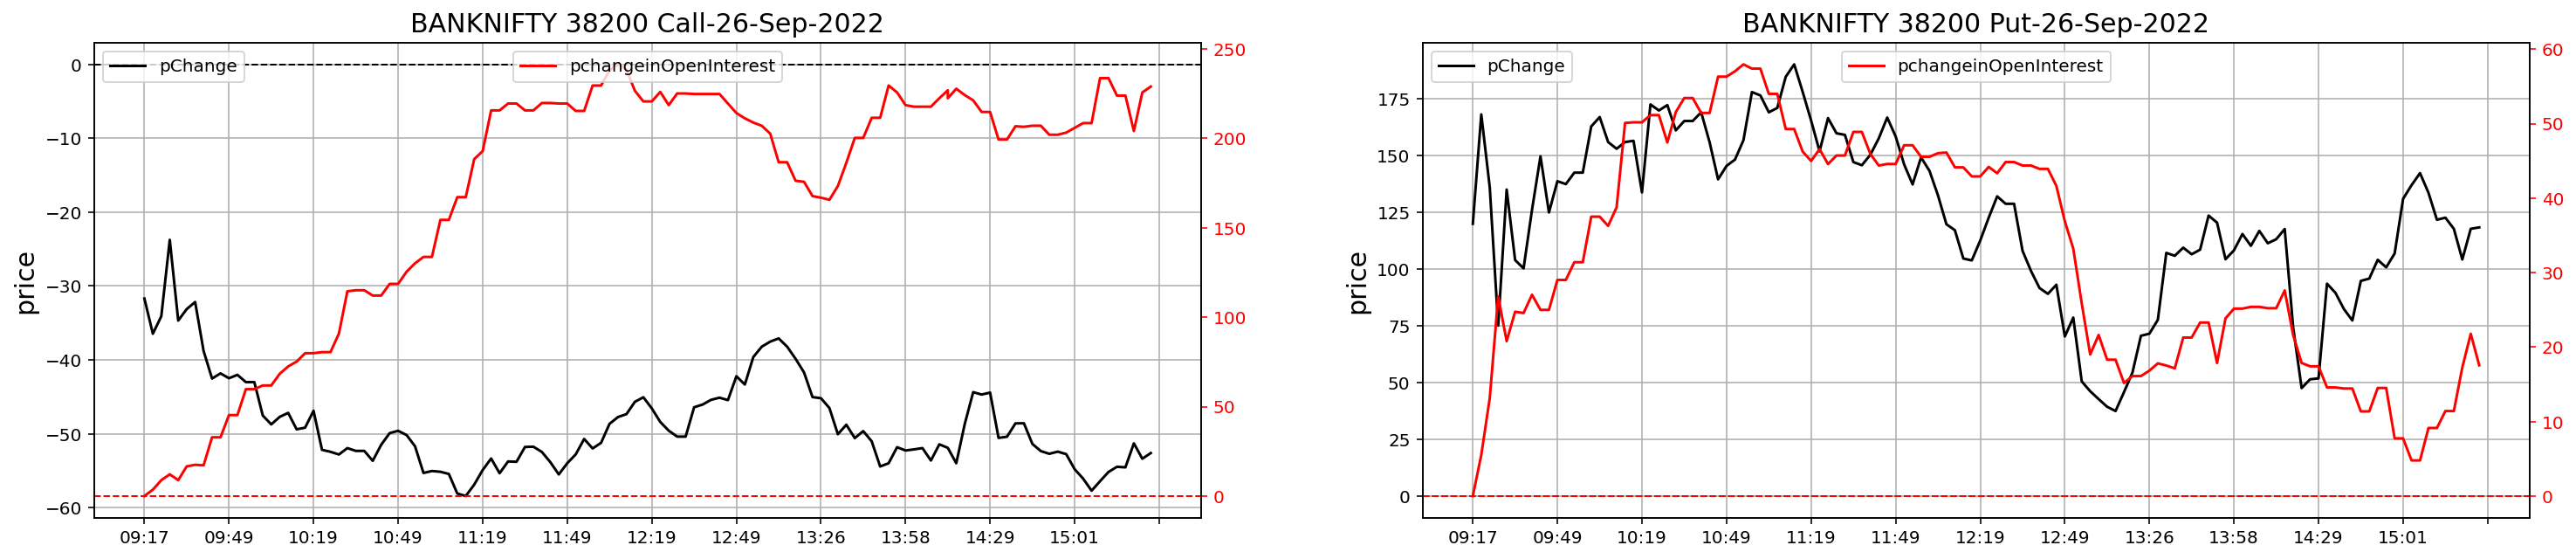

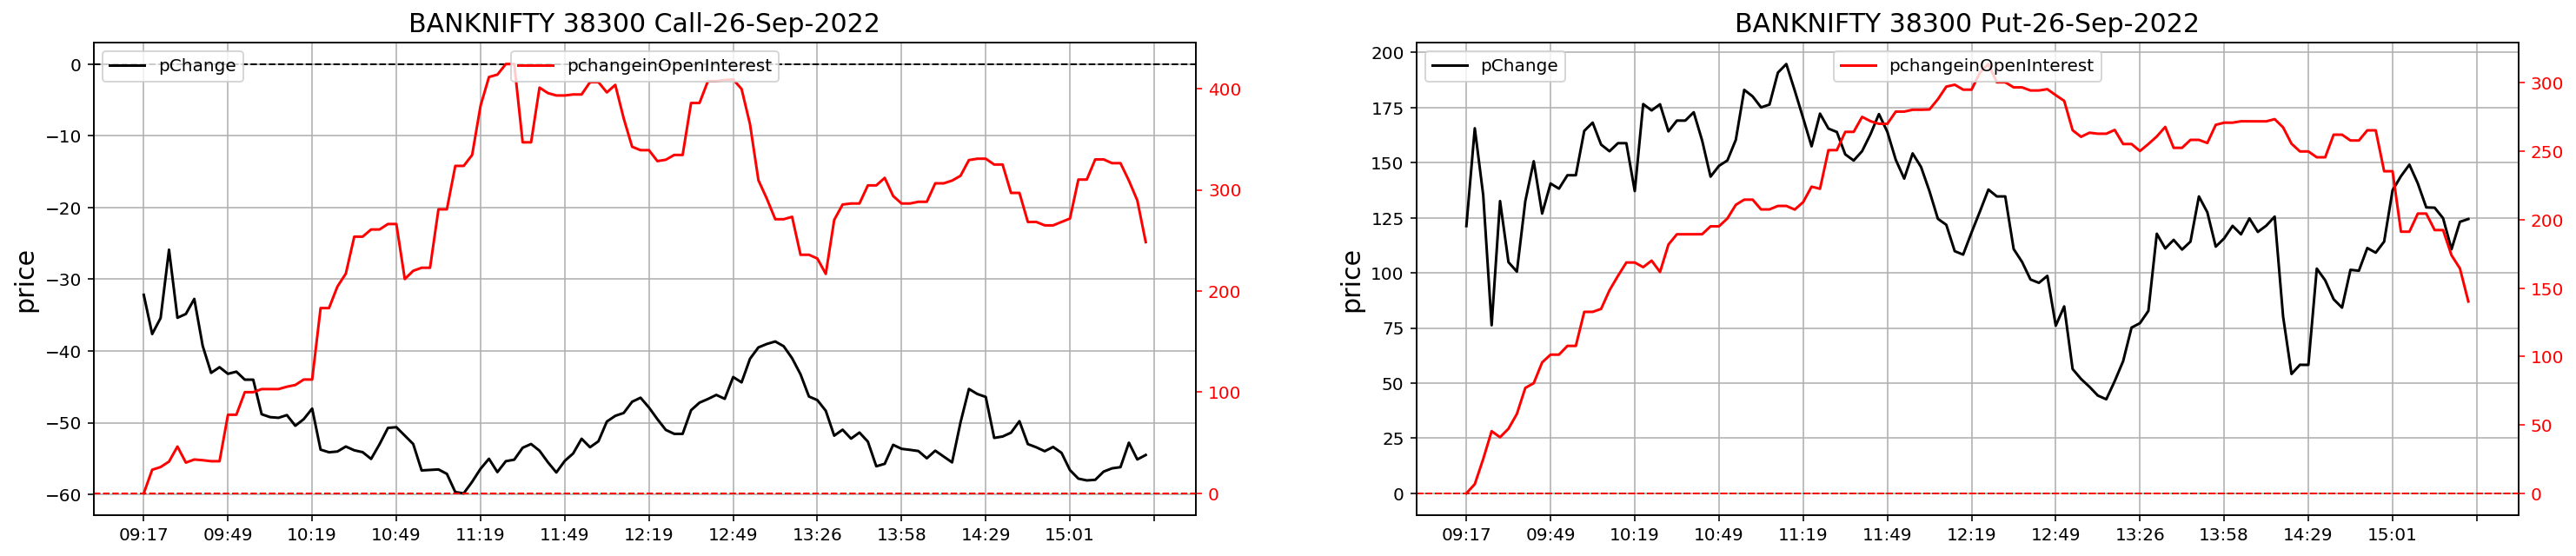

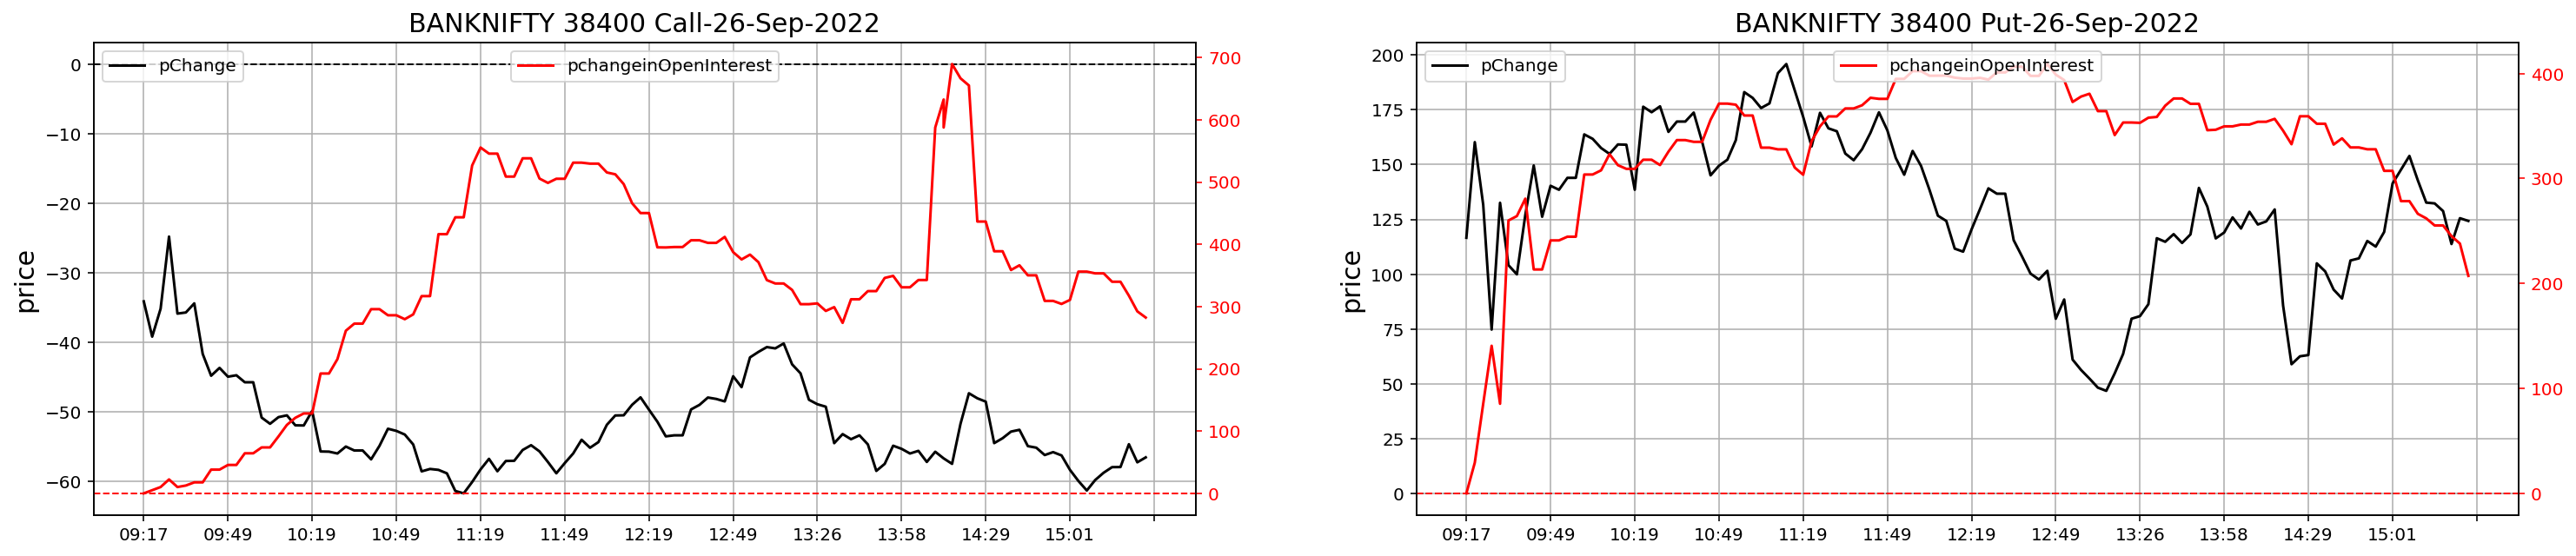

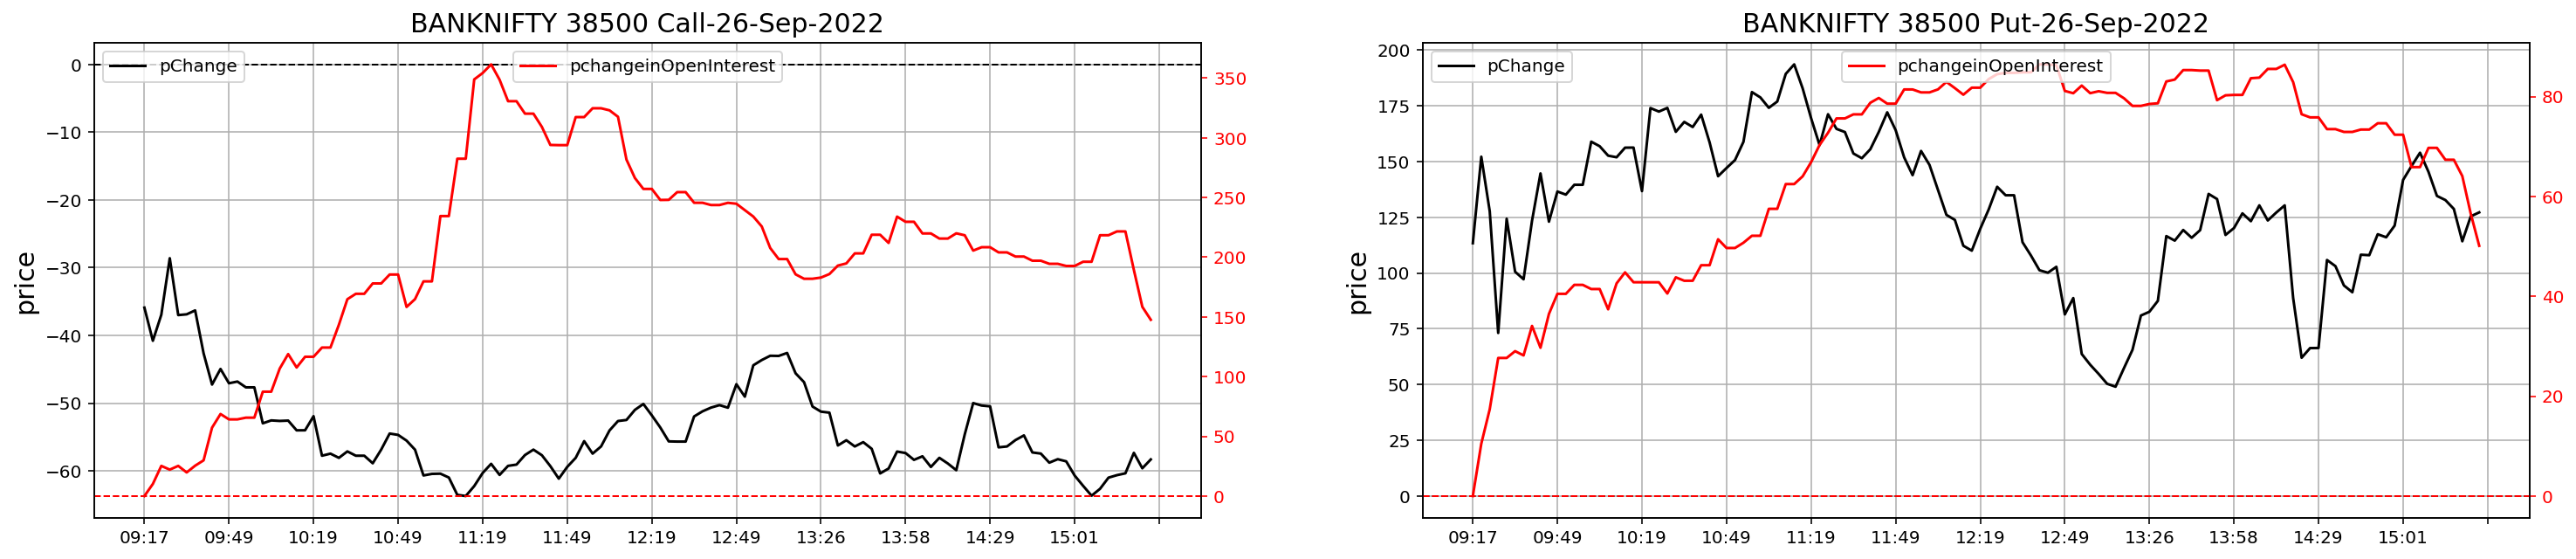

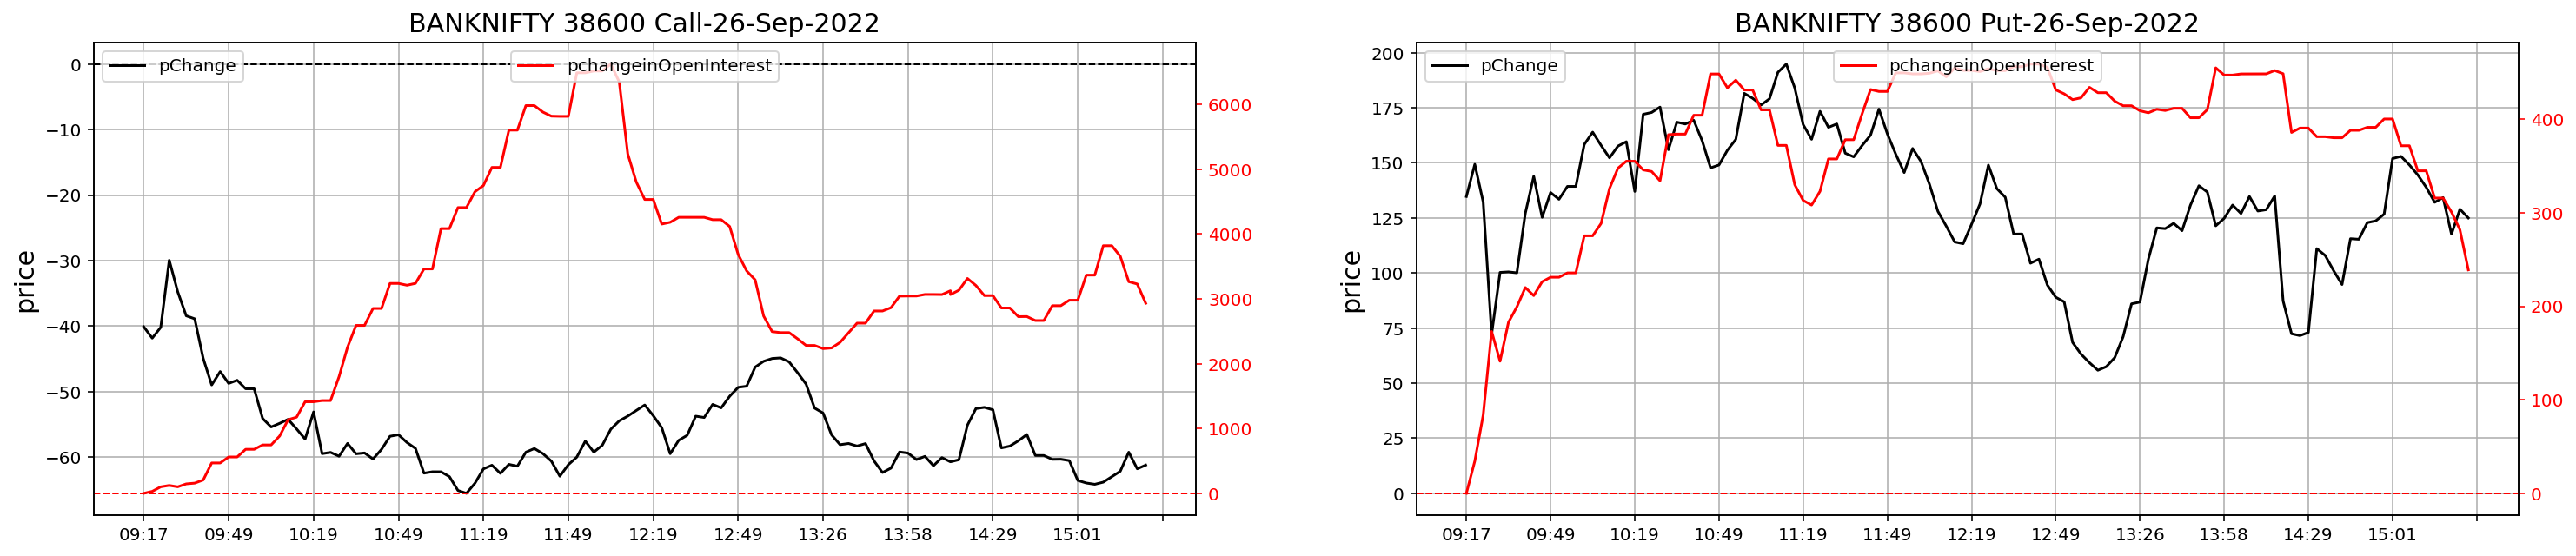

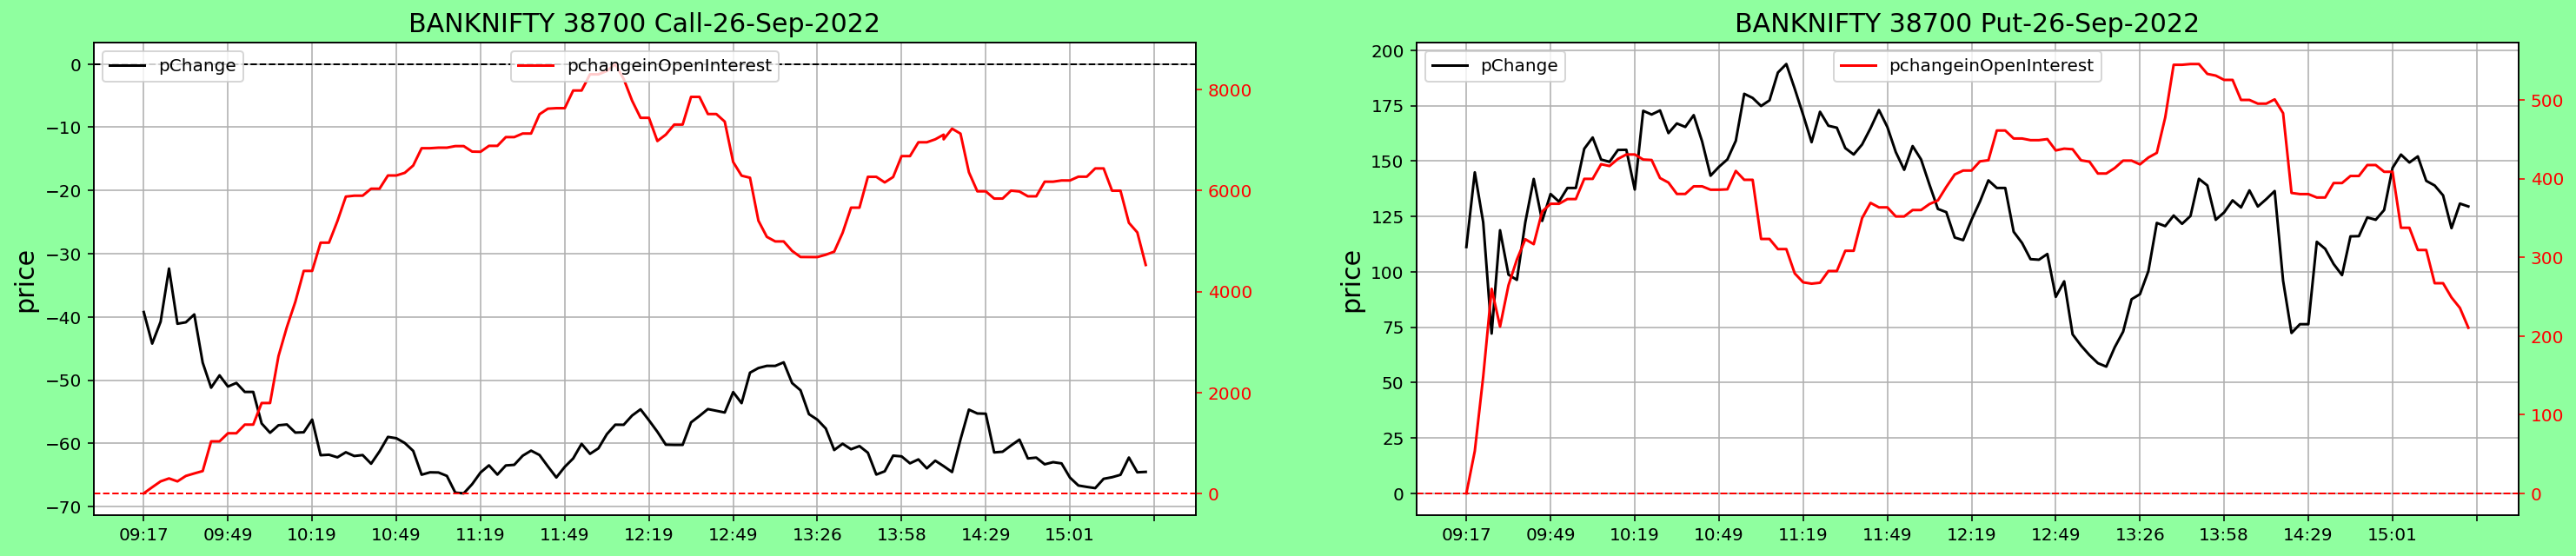

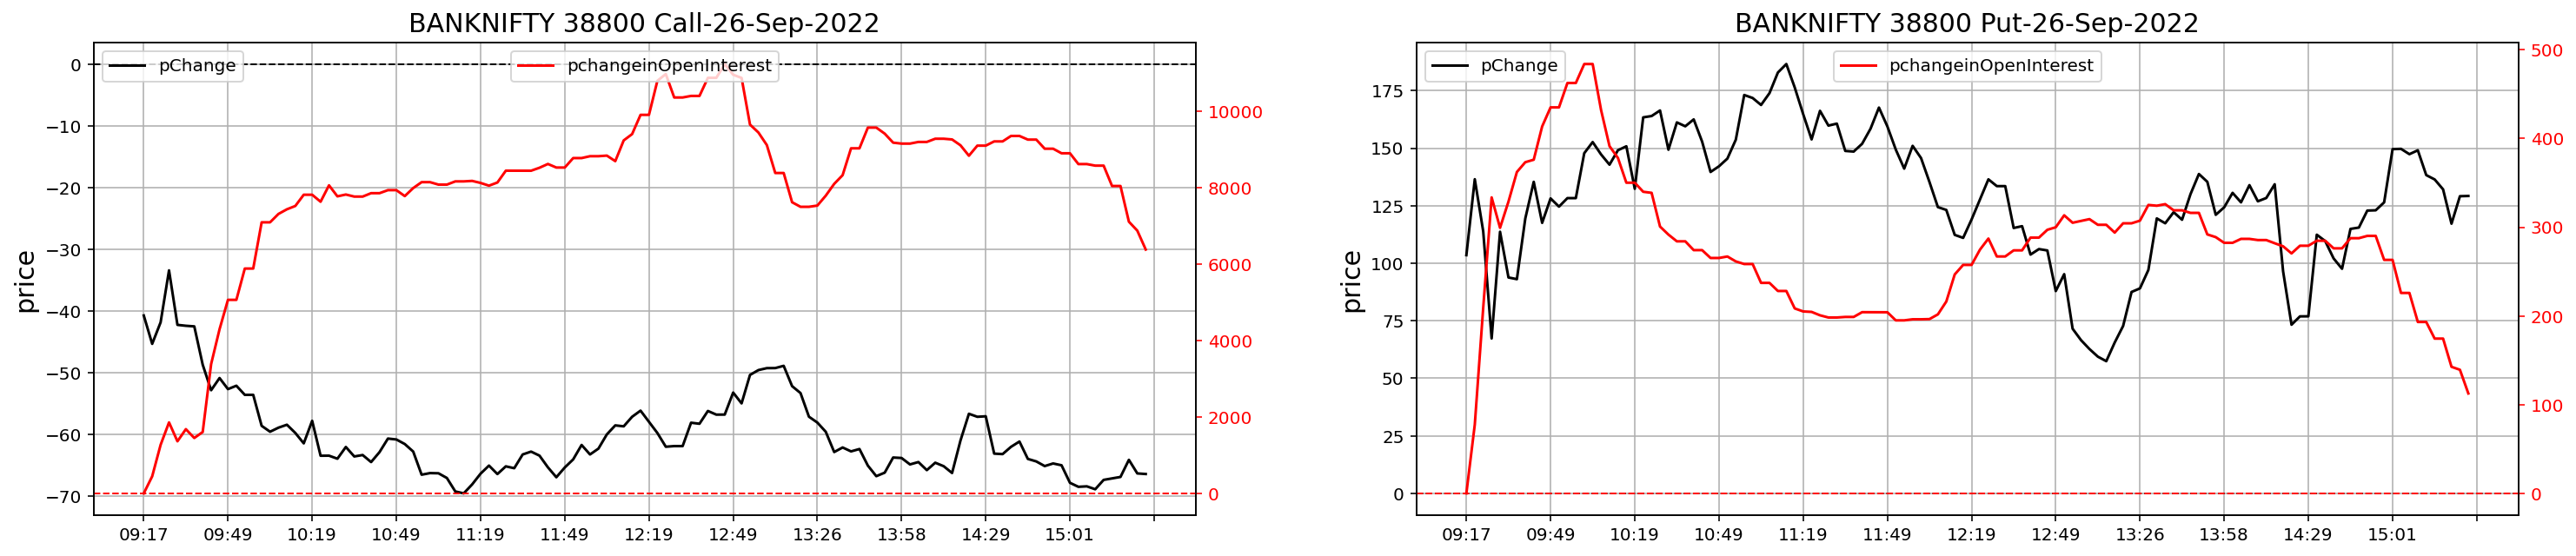

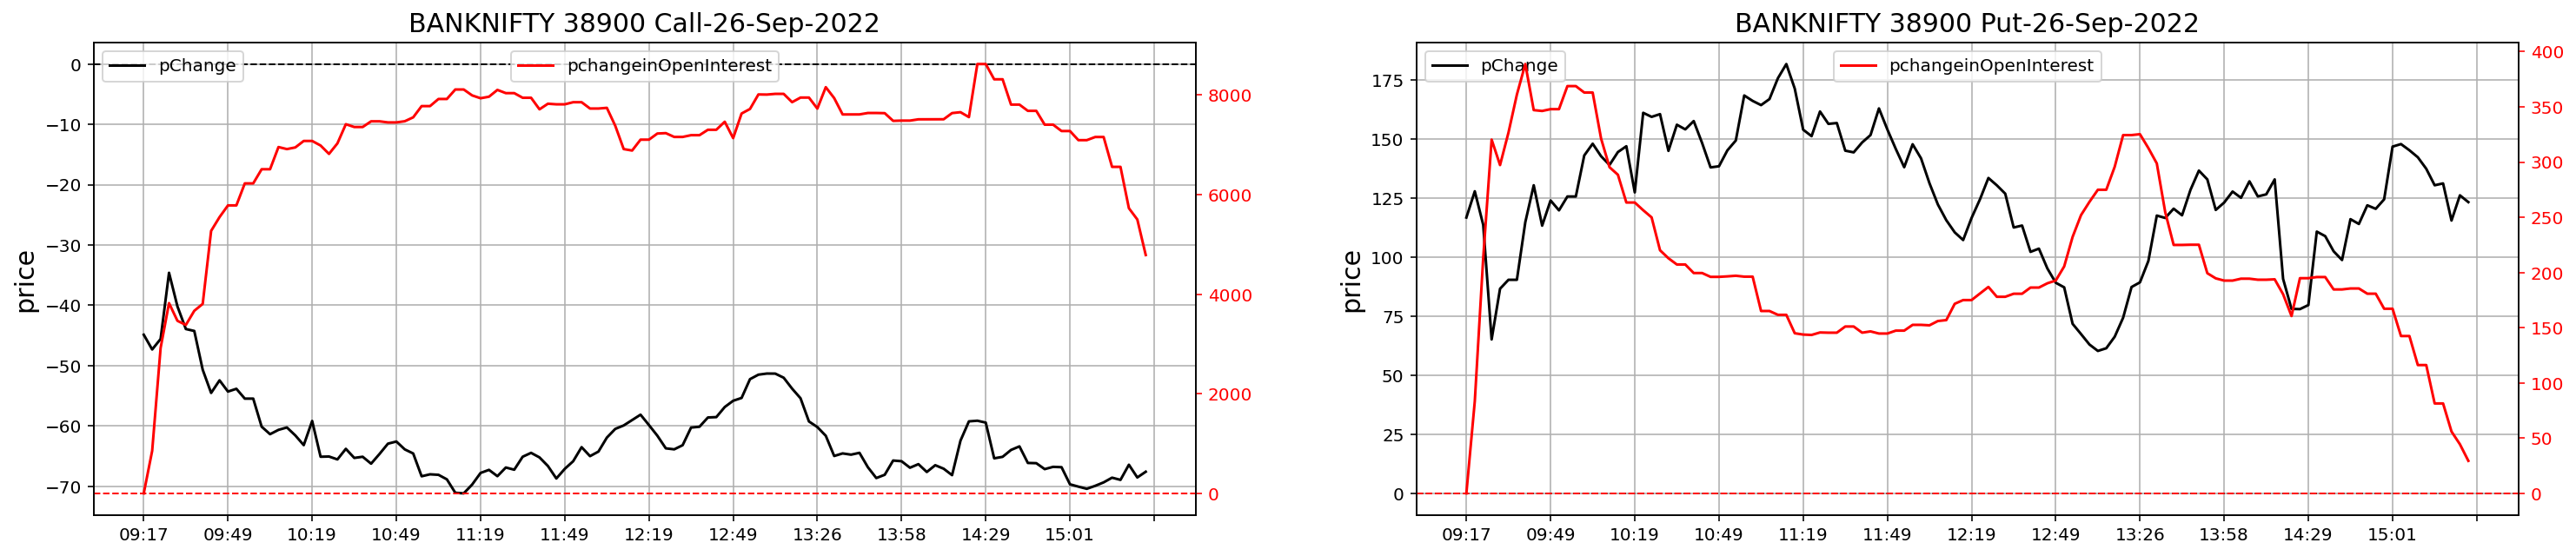

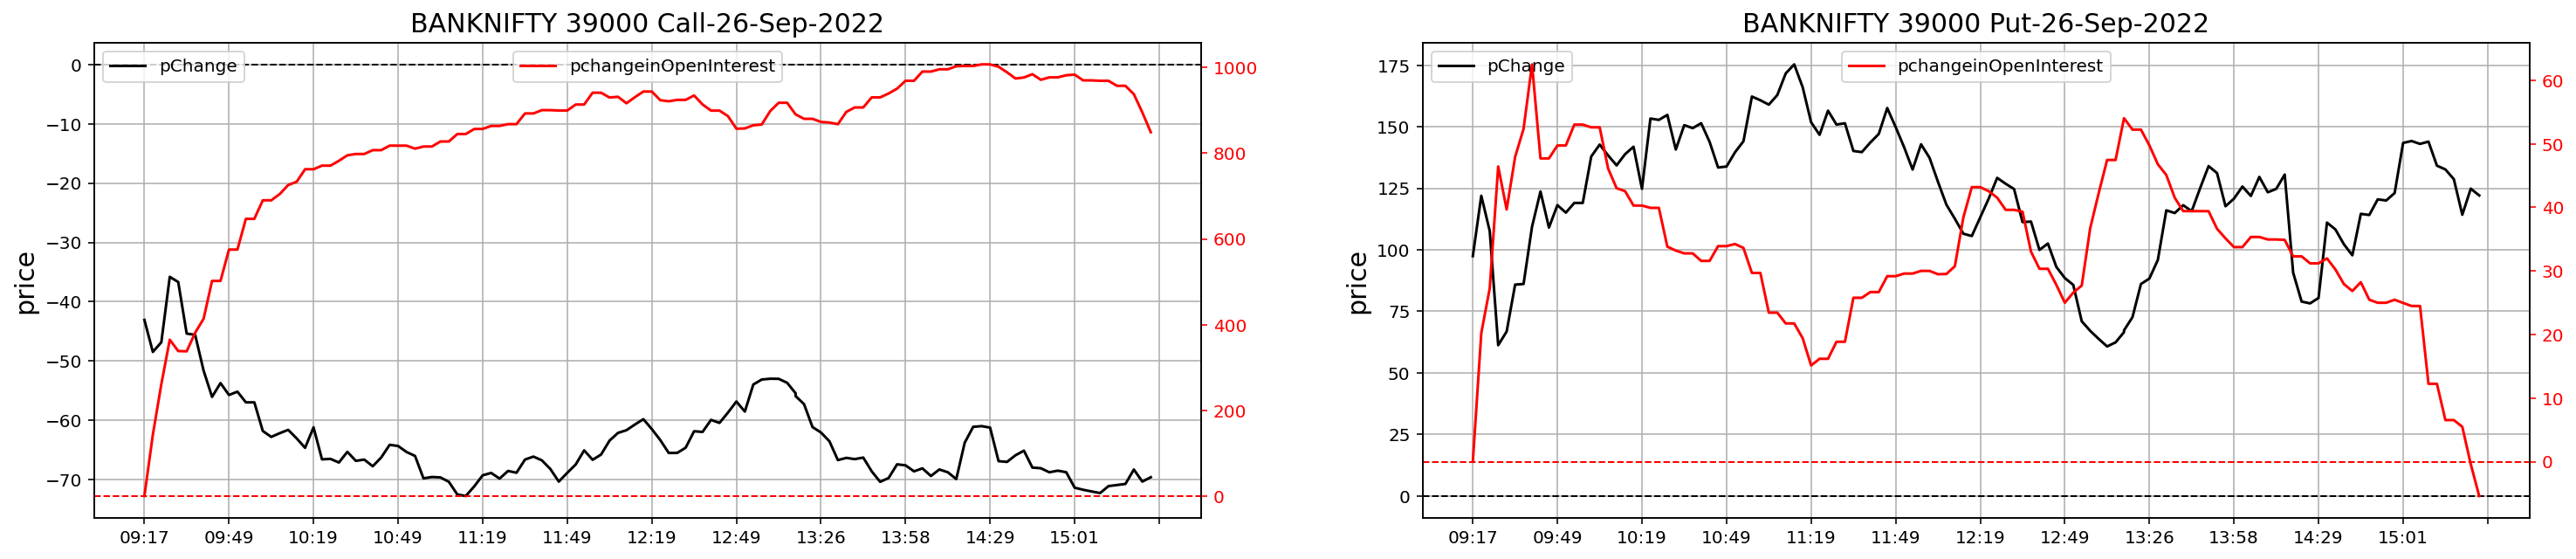

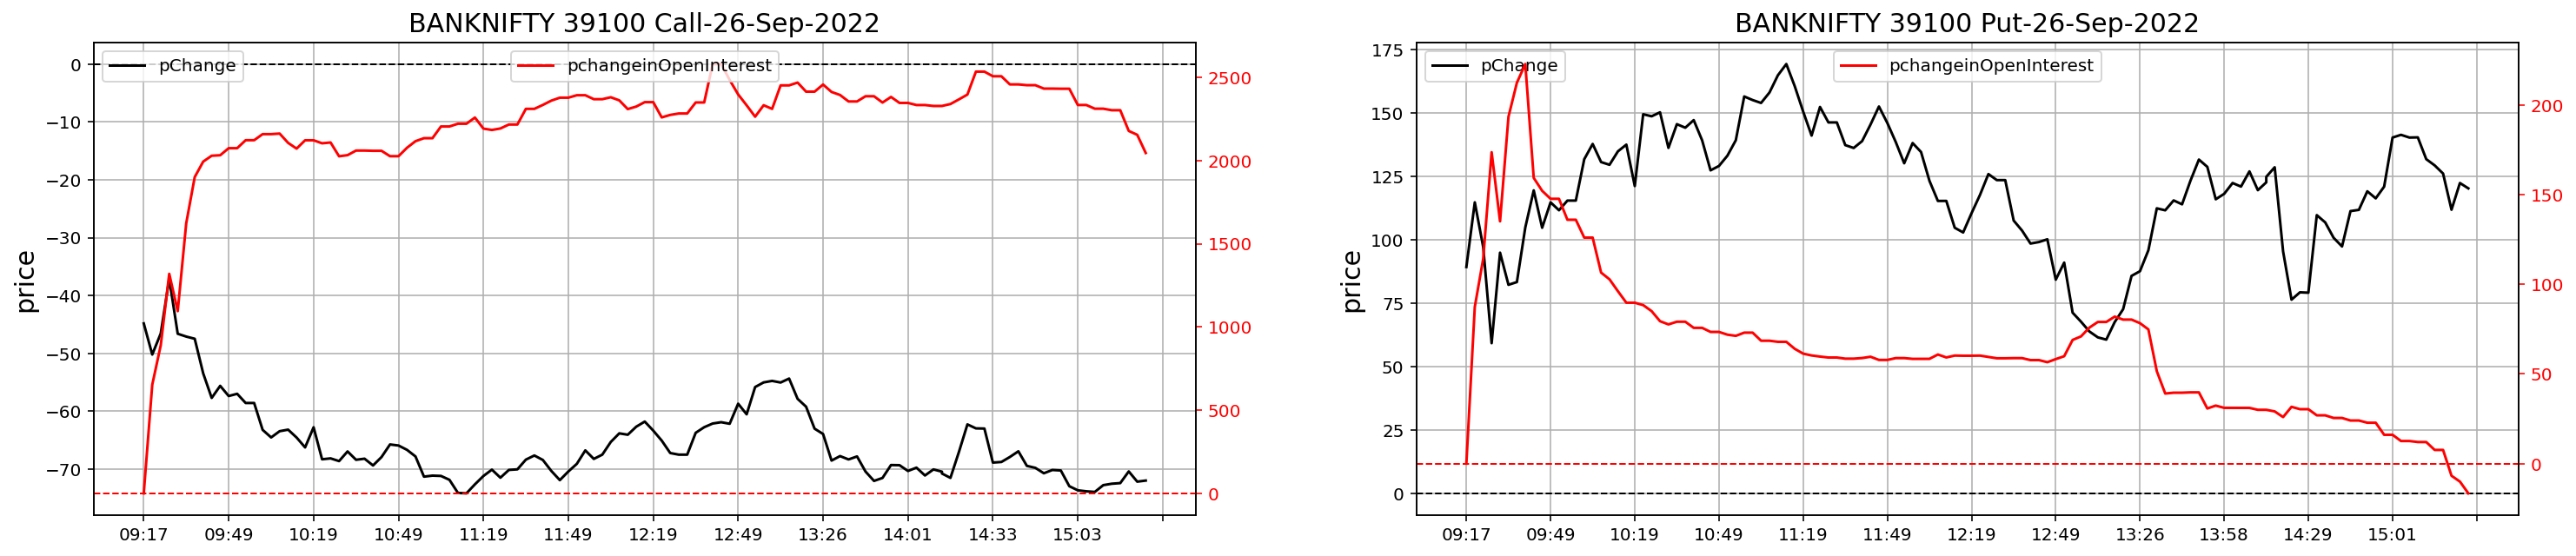

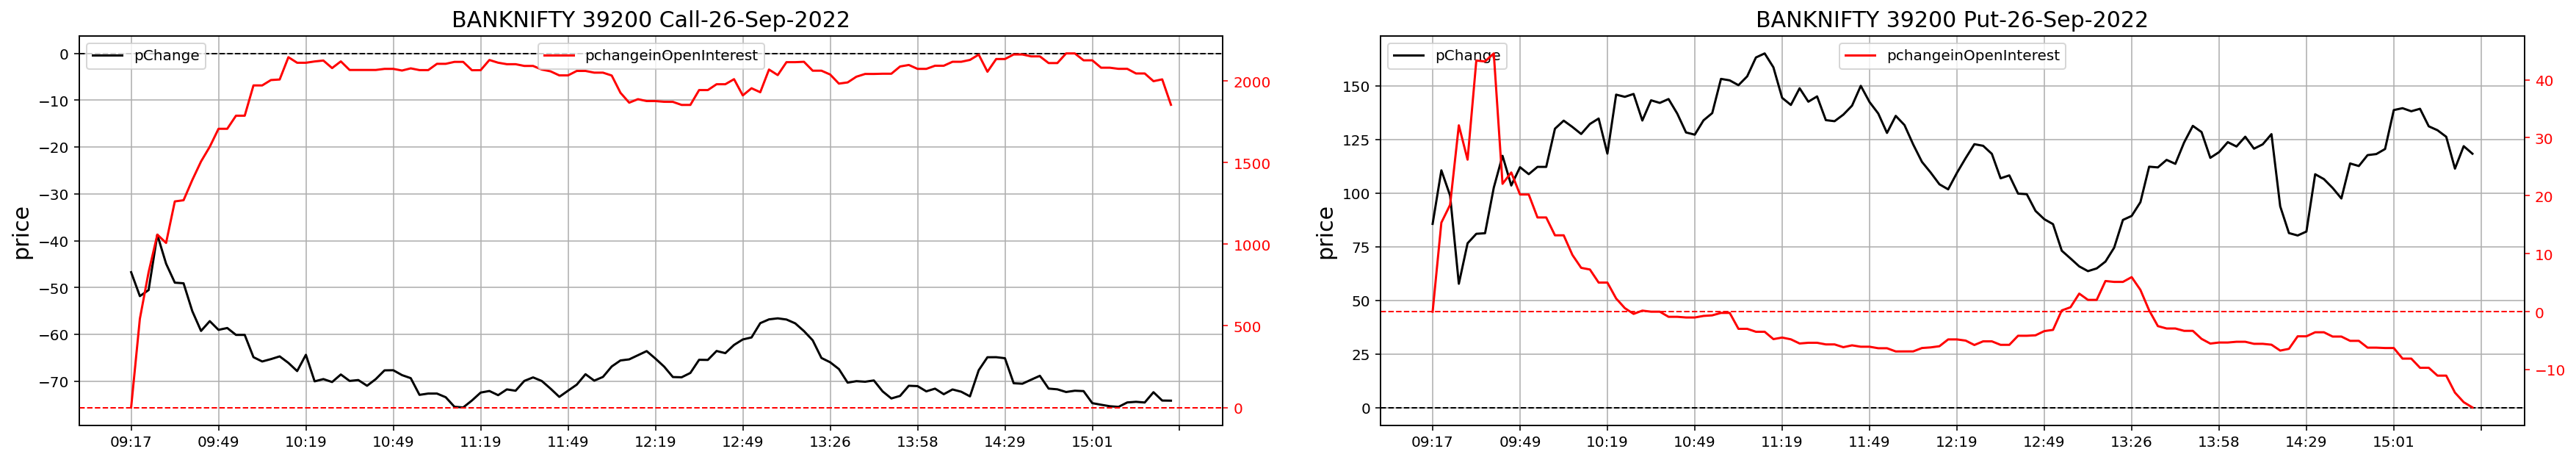

In [18]:
#Get ATM option chart here
for val in range(min_,max_+100,100):

    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,5),sharey=False)#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    get_option_plot(g1_ce,val,'Call',ax1)
    get_option_plot(g1_pe,val,'Put',ax2)
#     fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),sharey=True)#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

#     get_option_oi_ema_plot(g1_ce,val,'Call',ax1)
#     get_option_oi_ema_plot(g1_pe,val,'Put',ax2)

fig.tight_layout(pad=3)
plt.show()
